<a href="https://colab.research.google.com/github/datamongerbonny/Large-Data-Resources/blob/main/CISIipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copy the link from the repository into your code below:

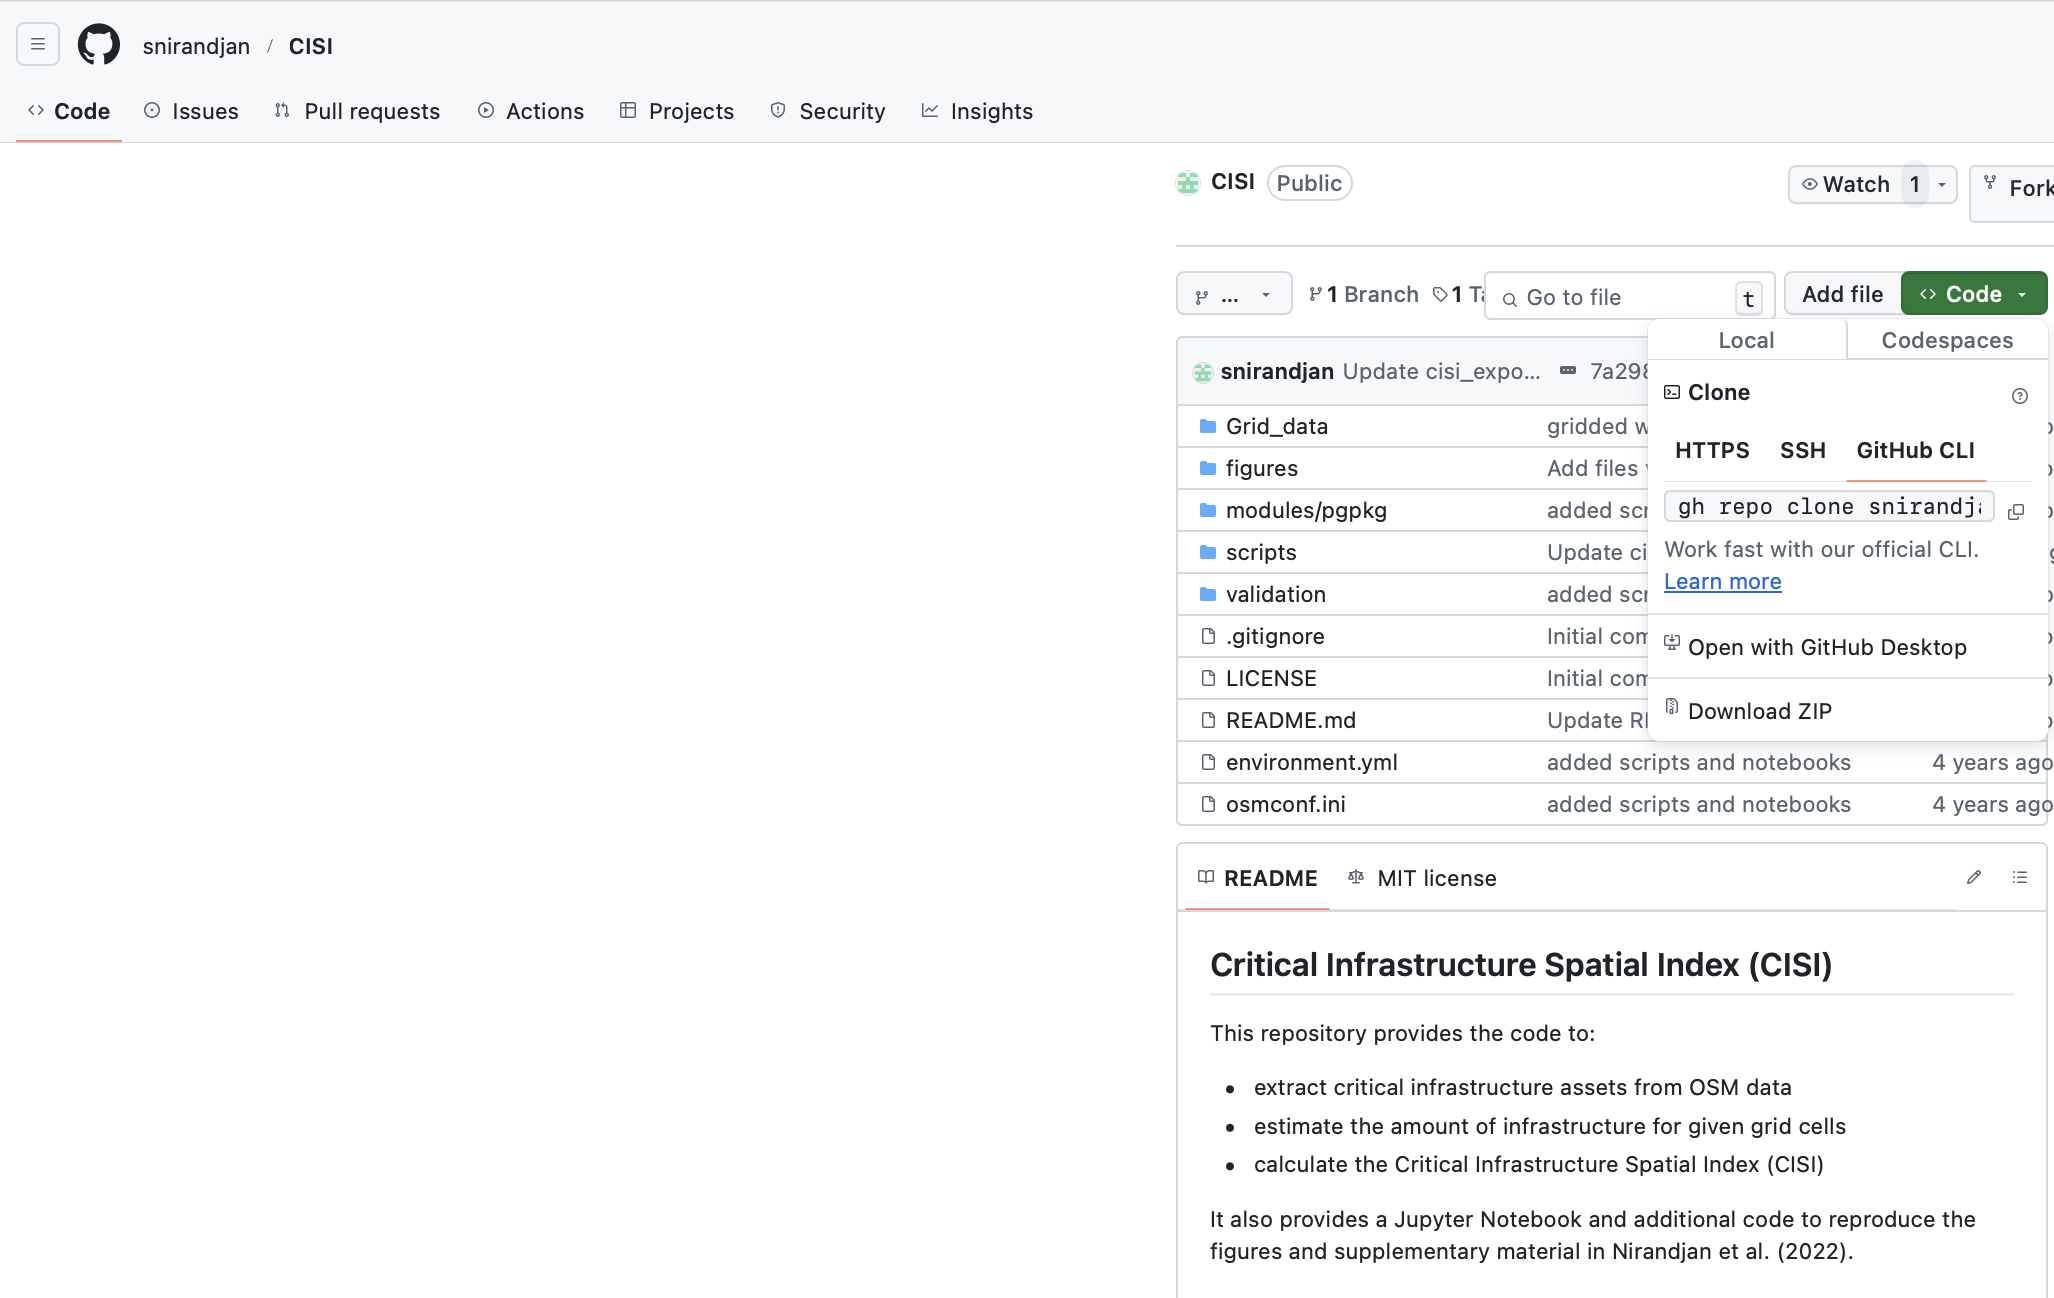

In [8]:
!git clone https://github.com/snirandjan/CISI.git


fatal: destination path 'CISI' already exists and is not an empty directory.


In [9]:
%cd /content/CISI

/content/CISI


# Use the correct python version for compatibility with packages
Also use exclamation mark to run shell commands in your notebook. I am running the Jupyter kernel Python3 that I use in all my active notebooks.


In [10]:
!conda create -n cisi python=3.8

/bin/bash: line 1: conda: command not found


In [ ]:
!conda init

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [11]:
%matplotlib inline

In [12]:
!conda install conda-forge::pygeos

/bin/bash: line 1: conda: command not found


In [13]:
!pip install geopandas pyarrow

In [ ]:
pip list


Package                 Version
----------------------- -----------
archspec                0.2.2
boltons                 23.1.1
Brotli                  1.1.0
certifi                 2024.12.14
cffi                    1.16.0
charset-normalizer      3.3.2
colorama                0.4.6
conda                   23.11.0
conda-libmamba-solver   23.12.0
conda-package-handling  2.2.0
conda_package_streaming 0.9.0
condacolab              0.1.9
distro                  1.8.0
geopandas               1.0.1
idna                    3.6
jsonpatch               1.33
jsonpointer             2.4
libmambapy              1.5.5
mamba                   1.5.5
menuinst                2.0.1
numpy                   1.26.4
packaging               23.2
pandas                  2.2.3
pip                     23.3.2
platformdirs            4.1.0
pluggy                  1.3.0
pyarrow                 18.1.0
pycosat                 0.6.6
pycparser               2.21
pygeos                  0.14
pyogrio                 0.

In [14]:
import geopandas as gpd
import pandas as pd



# Load the geofeather data
gdf = pd.read_feather("/content/CISI/Grid_data/global_grid_025.geofeather")

In [ ]:
print(gdf)

                                                 geometry
0       b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1       b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2       b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3       b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4       b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
...                                                   ...
266254  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
266255  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
266256  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
266257  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
266258  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...

[266259 rows x 1 columns]


In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkb

# Load the geofeather data
gdf = gpd.read_feather("/content/CISI/Grid_data/global_grid_025.geofeather")

# Convert WKB to Shapely geometries
gdf['geometry'] = gdf['geometry'].apply(lambda x: wkb.loads(x.encode()))  # Encode to bytes before loading

# Now try plotting as before
if gdf.geometry.geom_type[0] == 'Point':
    gdf['x'] = gdf.geometry.x
    gdf['y'] = gdf.geometry.y
    plt.scatter(gdf['x'], gdf['y'])
elif gdf.geometry.geom_type[0] in ['Polygon', 'MultiPolygon']:
    for geom in gdf.geometry:
        x, y = geom.exterior.xy
        plt.plot(x, y)
else:
    print("Unsupported geometry type for plotting")

plt.show()

ValueError: Missing geo metadata in Parquet/Feather file.
            Use pandas.read_parquet/read_feather() instead.

I can run as a pandas dataframe and convert later



# ...but hold on. OSM uses way_id not geom_type

In [17]:
print(type(gdf))

<class 'pandas.core.frame.DataFrame'>


# First, I am creating a GeoDataFrame

In [18]:
import pandas as pd
import geopandas as gpd
from shapely import wkb

# Read the geofeather data using pandas
df = pd.read_feather("/content/CISI/Grid_data/global_grid_025.geofeather")

# Check the DataFrame structure
print(df.head())  # Check if it contains a 'geometry' column

# Convert WKB (if needed) to Shapely geometries
if 'geometry' in df.columns:
    df['geometry'] = df['geometry'].apply(lambda x: wkb.loads(x, hex=True) if pd.notnull(x) else None)

# Create a GeoDataFrame using the DataFrame and specify the geometry column
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Verify the GeoDataFrame
print(type(gdf))  # Should print: <class 'geopandas.geodataframe.GeoDataFrame'>
print(gdf.head())  # Inspect the GeoDataFrame

# Now you can work with gdf as a GeoDataFrame, e.g., plotting, etc.

                                            geometry
0  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
<class 'geopandas.geodataframe.GeoDataFrame'>
                                            geometry
0  POLYGON ((-180 71.65833, -179.75 71.65833, -17...
1  POLYGON ((-180 71.40833, -179.75 71.40833, -17...
2  POLYGON ((-180 71.15833, -179.75 71.15833, -17...
3  POLYGON ((-180 69.15833, -179.75 69.15833, -17...
4  POLYGON ((-180 68.90833, -179.75 68.90833, -17...


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkb

# Step 1: Read the geofeather data using pandas
df = pd.read_feather("/content/CISI/Grid_data/global_grid_025.geofeather")

# Step 2: Check the DataFrame structure
print("DataFrame Structure:")
print(df.head())

# Step 3: Convert WKB (if needed) to Shapely geometries
if 'geometry' in df.columns:
    df['geometry'] = df['geometry'].apply(lambda x: wkb.loads(x, hex=True) if pd.notnull(x) else None)

# Step 4: Create a GeoDataFrame using the DataFrame and specify the geometry column
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Verify the GeoDataFrame
print("GeoDataFrame Type:")
print(type(gdf))  # Should print: <class 'geopandas.geodataframe.GeoDataFrame'>
print("GeoDataFrame Structure:")
print(gdf.head())  # Inspect the GeoDataFrame

# Step 5: Check unique geometry types for plotting
unique_geom_types = gdf.geometry.geom_type.unique()
print("Unique Geometry Types:", unique_geom_types)

# Step 6: Plot based on unique geometry types
for geometry_type in unique_geom_types:
    if geometry_type == 'Point':
        gdf['x'] = gdf.geometry.x
        gdf['y'] = gdf.geometry.y
        plt.scatter(gdf['x'], gdf['y'], color='blue', label='Points')
    elif geometry_type in ['Polygon', 'MultiPolygon']:
        for geom in gdf.geometry:
            if geom is not None:  # Check for None geometries
                if geometry_type == 'Polygon':
                    x, y = geom.exterior.xy
                    plt.plot(x, y, color='green', label='Polygons')
                elif geometry_type == 'MultiPolygon':
                    for polygon in geom:
                        x, y = polygon.exterior.xy
                        plt.plot(x, y, color='green', label='Polygons')
    else:
        print(f"Unsupported geometry type for plotting: {geometry_type}")

# Step 7: Show the plot
plt.title("Geospatial Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

DataFrame Structure:
                                            geometry
0  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
GeoDataFrame Type:
<class 'geopandas.geodataframe.GeoDataFrame'>
GeoDataFrame Structure:
                                            geometry
0  POLYGON ((-180 71.65833, -179.75 71.65833, -17...
1  POLYGON ((-180 71.40833, -179.75 71.40833, -17...
2  POLYGON ((-180 71.15833, -179.75 71.15833, -17...
3  POLYGON ((-180 69.15833, -179.75 69.15833, -17...
4  POLYGON ((-180 68.90833, -179.75 68.90833, -17...
Unique Geometry Types: ['Polygon']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [23]:
import osmium
import geopandas as gpd
from shapely.geometry import LineString

class GeneralInfrastructureHandler(osmium.SimpleHandler):
    """Handler to extract various types of infrastructure from OSM data."""

    def __init__(self):
        super(GeneralInfrastructureHandler, self).__init__()
        self.node_lookup = {}  # Store node coordinates by ID
        self.features = []      # Store the features collected

    def node(self, n):
        """Store valid node coordinates."""
        if n.location.valid():
            self.node_lookup[n.id] = (n.location.lon, n.location.lat)  # Save as a tuple

    def way(self, w):
        """Extract ways with their geometries and tags."""
        coordinates = []

        # Collect coordinates from node references
        for node_ref in w.nodes:
            if node_ref.ref in self.node_lookup:
                coordinates.append(self.node_lookup[node_ref.ref])

        # Proceed only if there are sufficient coordinates to create a geometry
        if len(coordinates) < 2:
            return  # Not enough data to create geometries

        # Create a LineString for pipelines
        line = LineString(coordinates)
        tags_dict = {tag.k: tag.v for tag in w.tags}  # Collect current way's tags

        # Add geometry and associated tags to features
        tags_dict['geometry'] = line
        self.features.append(tags_dict)

def extract_infrastructure(osm_path):
    """Extract various infrastructure from the provided OSM PBF file."""
    handler = GeneralInfrastructureHandler()
    handler.apply_file(osm_path)

    if not handler.features:
        print("No infrastructure features found.")
        return gpd.GeoDataFrame()  # Return an empty GeoDataFrame if no features found

    # Create GeoDataFrame from the features
    gdf = gpd.GeoDataFrame(handler.features, geometry='geometry', crs="EPSG:4326")
    return gdf

# Example execution with the specified path
osm_path = '/content/panama-latest.osm-2.pbf'  # Update with your actual OSM PBF file path
infrastructure_gdf = extract_infrastructure(osm_path)

# Print the retrieved infrastructure data
print("Retrieved infrastructure data:")
print(infrastructure_gdf.head())  # Display the first few rows

RuntimeError: Way callback keeps reference to OSM object. This is not allowed.

In [27]:
import osmium
import geopandas as gpd
from shapely.geometry import LineString, Polygon


class GeneralInfrastructureHandler(osmium.SimpleHandler):
    """Handler to extract various types of infrastructure from OSM data."""

    def __init__(self):
        super(GeneralInfrastructureHandler, self).__init__()
        self.node_lookup = {}
        self.features = []

    def node(self, n):
        """Store valid node coordinates by node ID."""
        if n.location.valid():
            self.node_lookup[n.id] = (n.location.lon, n.location.lat)

    def way(self, w):
        """Extract ways and their tags as features."""
        coordinates = []

        # Collect coordinates corresponding to the node IDs in the way
        for node_ref in w.nodes:
            if node_ref.ref in self.node_lookup:
                coordinates.append(self.node_lookup[node_ref.ref])

        # Need at least two coordinates to create a LineString or Polygon
        if len(coordinates) < 2:
            return  # Not enough points to create a geometry

        # Create a LineString for pipelines
        tags_dict = {tag.k: tag.v for tag in w.tags}  # Collect tags for the way
        if 'man_made' in tags_dict and tags_dict['man_made'] == 'pipeline':
            line = LineString(coordinates)  # Create the geometry
            tags_dict['geometry'] = line
            self.features.append(tags_dict)  # Append feature without retaining OSM object references

def extract_infrastructure(osm_path):
    """Extract various types of infrastructure from the provided OSM PBF file."""
    handler = GeneralInfrastructureHandler()

    # Apply the handler to the OSM PBF file
    handler.apply_file(osm_path)

    if not handler.features:
        print("No infrastructure features found.")
        return gpd.GeoDataFrame()  # Return an empty GeoDataFrame if no features collected

    # Convert collected features into a GeoDataFrame
    gdf = gpd.GeoDataFrame(handler.features, geometry='geometry', crs="EPSG:4326")
    return gdf

# Example execution
osm_path = '/content/panama-latest.osm-2.pbf'  # Update with your actual OSM PBF file path
infrastructure_gdf = extract_infrastructure(osm_path)

# Print the retrieved infrastructure data
print("Retrieved infrastructure data:")
print(infrastructure_gdf.head())  # Display the first few rows

Retrieved infrastructure data:
       fixme     location  man_made quantity   type  \
0  direction   overground  pipeline        3  water   
1  direction   overground  pipeline      NaN  water   
2        NaN   overground  pipeline      NaN    NaN   
3        NaN   overground  pipeline      NaN    NaN   
4        NaN  underground  pipeline      NaN    NaN   

                                            geometry layer  \
0  LINESTRING (-79.82265 9.38992, -79.82284 9.390...   NaN   
1  LINESTRING (-79.82263 9.3899, -79.82269 9.3900...   NaN   
2  LINESTRING (-82.87549 8.20421, -82.87614 8.204...     1   
3  LINESTRING (-82.87671 8.20033, -82.87666 8.200...     1   
4  LINESTRING (-82.87801 8.26766, -82.87868 8.269...    -1   

                          operator substance flow_direction  \
0                              NaN       NaN            NaN   
1                              NaN       NaN            NaN   
2  Petroterminales de Panamá (PTP)       oil            NaN   
3  Petrotermi

# QGIS is a great resource to validate if there is existing data

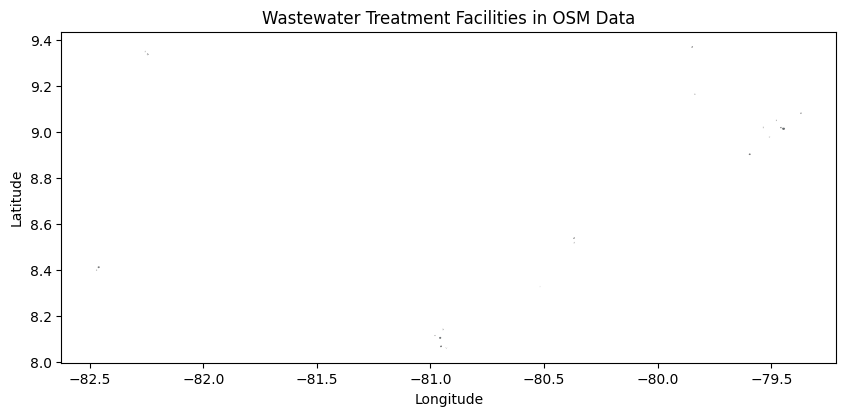

In [34]:
import osmium
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

class WasteWaterHandler(osmium.SimpleHandler):
    """Handler to extract wastewater facilities from OSM data."""
    def __init__(self):
        super(WasteWaterHandler, self).__init__()
        self.node_lookup = {}
        self.features = []

    def node(self, n):
        """Store node coordinates by node ID."""
        if n.location.valid():
            self.node_lookup[n.id] = (n.location.lon, n.location.lat)

    def way(self, w):
        """Extract ways tagged as wastewater facilities."""
        if 'man_made' in w.tags and 'wastewater_plant' in w.tags['man_made']:
            coordinates = []

            for node_ref in w.nodes:
                if node_ref.ref in self.node_lookup:
                    coordinates.append(self.node_lookup[node_ref.ref])

            if len(coordinates) >= 3:
                polygon = Polygon(coordinates)
                tags_dict = {tag.k: tag.v for tag in w.tags}
                tags_dict['geometry'] = polygon
                self.features.append(tags_dict)

def extract_waste_water(osm_path):
    """Extract wastewater treatment facilities from the provided OSM PBF file."""
    handler = WasteWaterHandler()
    handler.apply_file(osm_path)

    if not handler.features:
        print("No wastewater features found.")
        return gpd.GeoDataFrame()

    gdf = gpd.GeoDataFrame(handler.features, geometry='geometry', crs="EPSG:4326")
    return gdf

def visualize_waste_water(gdf):
    """Visualize wastewater facilities on a map."""
    if gdf.empty:
        print("No wastewater data to visualize.")
        return

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, edgecolor='black', alpha=0.5)

    ax.set_title('Wastewater Treatment Facilities in OSM Data')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Main execution
osm_path = '/content/panama-latest.osm-2.pbf'  # Update this to your file path
waste_water_gdf = extract_waste_water(osm_path)
visualize_waste_water(waste_water_gdf)

Extracted pipeline with ID 216251147
Extracted pipeline with ID 216251168
Extracted pipeline with ID 220671039
Extracted pipeline with ID 221894086
Extracted pipeline with ID 221906192
Extracted pipeline with ID 283794927
Extracted pipeline with ID 330665694
Extracted pipeline with ID 330665695
Extracted pipeline with ID 330665696
Extracted pipeline with ID 330665697
Extracted pipeline with ID 330684342
Extracted pipeline with ID 330684343
Extracted pipeline with ID 330684344
Extracted pipeline with ID 562318502
Extracted pipeline with ID 562318527
Extracted pipeline with ID 794947130
Extracted pipeline with ID 794947133
Extracted pipeline with ID 794947134
Extracted pipeline with ID 883711117
Extracted pipeline with ID 948865735
Extracted pipeline with ID 948865736
Extracted pipeline with ID 948865737
Extracted pipeline with ID 948865738
Extracted pipeline with ID 948865739
Extracted pipeline with ID 955903166
Extracted pipeline with ID 958225931
Extracted pipeline with ID 958225933
E

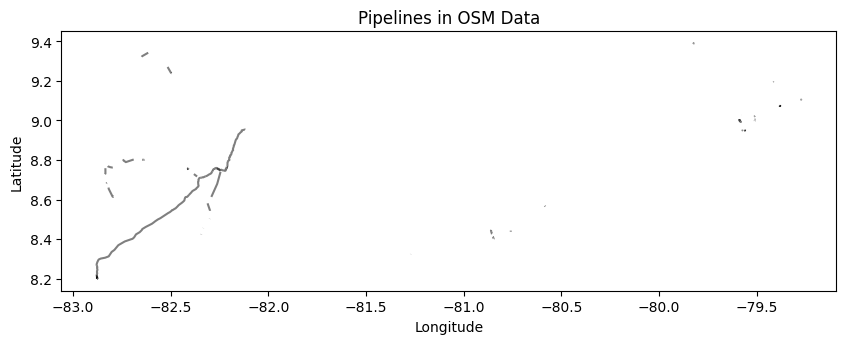

In [29]:
import osmium
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

class PipelineHandler(osmium.SimpleHandler):
    """Handler to extract pipelines from OSM data."""
    def __init__(self):
        super(PipelineHandler, self).__init__()
        self.node_lookup = {}
        self.features = []

    def node(self, n):
        """Store node coordinates by node ID."""
        if n.location.valid():
            self.node_lookup[n.id] = (n.location.lon, n.location.lat)

    def way(self, w):
        """Extract ways tagged as pipelines."""
        if 'man_made' in w.tags and w.tags['man_made'] == 'pipeline':
            coordinates = []

            for node_ref in w.nodes:
                if node_ref.ref in self.node_lookup:
                    coordinates.append(self.node_lookup[node_ref.ref])

            # Create a LineString from the collected coordinates
            if len(coordinates) >= 2:  # At least 2 points needed for a line
                line = LineString(coordinates)
                tags_dict = {tag.k: tag.v for tag in w.tags}
                tags_dict['geometry'] = line
                self.features.append(tags_dict)
                print(f"Extracted pipeline with ID {w.id}")

def extract_pipelines(osm_path):
    """Extract pipelines from the provided OSM PBF file."""
    handler = PipelineHandler()
    handler.apply_file(osm_path)

    if not handler.features:
        print("No pipeline features found.")
        return gpd.GeoDataFrame()

    # Create a GeoDataFrame from the collected features
    gdf = gpd.GeoDataFrame(handler.features, geometry='geometry', crs="EPSG:4326")
    return gdf

def visualize_pipelines(gdf):
    """Visualize pipeline features on a map."""
    if gdf.empty:
        print("No pipeline data to visualize.")
        return

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, edgecolor='black', alpha=0.5)

    ax.set_title('Pipelines in OSM Data')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Main execution
osm_path = '/content/panama-latest.osm-2.pbf'  # Update this to your file path
pipeline_gdf = extract_pipelines(osm_path)
visualize_pipelines(pipeline_gdf)

# Let's add a basemap

In [80]:
!pip install contextily

Extracted pipeline with ID 216251147
Extracted pipeline with ID 216251168
Extracted pipeline with ID 220671039
Extracted pipeline with ID 221894086
Extracted pipeline with ID 221906192
Extracted pipeline with ID 283794927
Extracted pipeline with ID 330665694
Extracted pipeline with ID 330665695
Extracted pipeline with ID 330665696
Extracted pipeline with ID 330665697
Extracted pipeline with ID 330684342
Extracted pipeline with ID 330684343
Extracted pipeline with ID 330684344
Extracted pipeline with ID 562318502
Extracted pipeline with ID 562318527
Extracted pipeline with ID 794947130
Extracted pipeline with ID 794947133
Extracted pipeline with ID 794947134
Extracted pipeline with ID 883711117
Extracted pipeline with ID 948865735
Extracted pipeline with ID 948865736
Extracted pipeline with ID 948865737
Extracted pipeline with ID 948865738
Extracted pipeline with ID 948865739
Extracted pipeline with ID 955903166
Extracted pipeline with ID 958225931
Extracted pipeline with ID 958225933
E

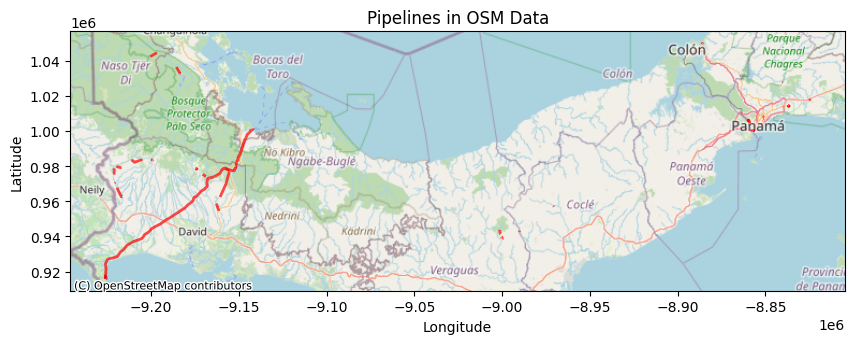

In [32]:
import osmium
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import contextily as ctx

class PipelineHandler(osmium.SimpleHandler):
    """Handler to extract pipelines from OSM data."""
    def __init__(self):
        super(PipelineHandler, self).__init__()
        self.node_lookup = {}
        self.features = []

    def node(self, n):
        """Store node coordinates by node ID."""
        if n.location.valid():
            self.node_lookup[n.id] = (n.location.lon, n.location.lat)

    def way(self, w):
        """Extract ways tagged as pipelines."""
        if 'man_made' in w.tags and w.tags['man_made'] == 'pipeline':
            coordinates = []

            for node_ref in w.nodes:
                if node_ref.ref in self.node_lookup:
                    coordinates.append(self.node_lookup[node_ref.ref])

            if len(coordinates) >= 2:  # At least 2 points needed for a line
                line = LineString(coordinates)
                tags_dict = {tag.k: tag.v for tag in w.tags}
                tags_dict['geometry'] = line
                self.features.append(tags_dict)
                print(f"Extracted pipeline with ID {w.id}")

def extract_pipelines(osm_path):
    """Extract pipelines from the provided OSM PBF file."""
    handler = PipelineHandler()
    handler.apply_file(osm_path)

    if not handler.features:
        print("No pipeline features found.")
        return gpd.GeoDataFrame()

    gdf = gpd.GeoDataFrame(handler.features, geometry='geometry', crs="EPSG:4326")
    return gdf

def visualize_pipelines(gdf):
    """Visualize pipeline features on a map with an OSM basemap."""
    if gdf.empty:
        print("No pipeline data to visualize.")
        return

    gdf = gdf.to_crs(epsg=3857)  # Project to Web Mercator
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotting the GeoDataFrame with pipelines in red
    gdf.plot(ax=ax, edgecolor='red', linewidth=2, alpha=0.7)

    # Add OpenStreetMap basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    ax.set_title('Pipelines in OSM Data')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Main execution
osm_path = '/content/panama-latest.osm-2.pbf'  # Update this to your file path
pipeline_gdf = extract_pipelines(osm_path)
visualize_pipelines(pipeline_gdf)

In [35]:
import pandas as pd

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 100)  # Change 100 to any number you like, or use None for unlimited

# Now print your GeoDataFrame
print(infrastructure_gdf)

         fixme     location  man_made quantity   type  \
0    direction   overground  pipeline        3  water   
1    direction   overground  pipeline      NaN  water   
2          NaN   overground  pipeline      NaN    NaN   
3          NaN   overground  pipeline      NaN    NaN   
4          NaN  underground  pipeline      NaN    NaN   
..         ...          ...       ...      ...    ...   
120        NaN          NaN  pipeline      NaN    NaN   
121        NaN          NaN  pipeline      NaN    NaN   
122        NaN      surface  pipeline      NaN    NaN   
123        NaN      surface  pipeline      NaN    NaN   
124        NaN      surface  pipeline      NaN    NaN   

                                              geometry layer  \
0    LINESTRING (-79.82265 9.38992, -79.82284 9.390...   NaN   
1    LINESTRING (-79.82263 9.3899, -79.82269 9.3900...   NaN   
2    LINESTRING (-82.87549 8.20421, -82.87614 8.204...     1   
3    LINESTRING (-82.87671 8.20033, -82.87666 8.200...     